In [1]:
import numpy as np
import scipy.optimize

import matplotlib.pyplot as plt
%matplotlib inline

# Теория

Пусть регрессионная модель — полином заданной степени $p$,

$$y_i= \sum_{j=1}^p w_j x_i^{j-1} + \varepsilon_i.$$
Согласно методу наименьших квадратов, искомый вектор параметров $\mathbf{w}=(w_1,...,w_p)^T$ есть решение нормального уравнения

$$\mathbf{w} = (A^TA)^{-1}A^T\mathbf{y},$$
где $\mathbf{y}$ — вектор, состоящий из значений зависимой переменной, $\mathbf{y}=(y_1,\ldots, y_m)$. Столбцы матрицы $A$ есть подстановки значений свободной переменной $x_i^0\mapsto a_{i1}$, $x_i^1\mapsto a_{i2}$,..., $x_i^p\mapsto a_{ip}$,  $i=1,\ldots, m$. 

Матрица $A$ в случае полиномиальной регрессии называется матрицей Вандермонда и принимает вид $$A =\left(\begin{array}{ccccc} 1 & x_1 & x_1^2 & \ldots & x_1^p\\ 1 & x_2 & x_2^2 & \ldots & x_2^p\\ \ldots & \ldots & \ldots & \ldots\\ 1 & x_m & x_m^2 & \ldots & x_m^p\\ \end{array} \right).$$

Зависимая переменная восстанавливается по полученным весам и заданным значениям свободной переменной

$$y^*_i = \sum_{j=1}^p w_j x_i^{j-1},$$
иначе

$$\mathbf{y}^* = A\mathbf{w}.$$
Для оценки качества модели используется критерий суммы квадратов регрессионных остатков, SSE — Sum of Squared Errors.

$$SSE = \sum_{i=1}^m(y_i-y_i^*)^2 = (\mathbf{y}-\mathbf{y}^*)^T(\mathbf{y}-\mathbf{y}^*).$$

In [2]:
class PolynomialRegression(object):
    
    def __init__(self, max_degree=1):
        self.max_degree = max_degree
        self.degree = 0
        
    #loss function (e.g. Quadratic Loss)
    def __loss(self, y_pred, y_true):
        return np.sum(np.power(np.array(y_pred) - np.array(y_true), 2))
        
    def fit(self, points_x, points_y):
        #iterate over all degree values
        min_loss = 10e10
        for degree in range(self.max_degree+1):
            
            #calculate optimal weights for degree
            def func(weights):
                return self.__loss(sum([np.dot(np.power(points_x, j), weights[j]) for j in range(0, degree+1)]), points_y)
            
            #create matrix A
            matrix_A = np.array([np.power(points_x, J) for J in range(self.max_degree+1)]).T
            
            #calc A.T * y
            w_up = np.dot(matrix_A.T, points_y)
            
            #calc inverse matrix A.T * A
            w_down = np.linalg.inv(np.dot(matrix_A.T, matrix_A))
            
            #calc weights as multiplication (A.T*y) and (A.T*A)^-1
            weights = np.dot(w_down, w_up)
            
            #get loss for prediction values by func with optimal weights
            loss_pred = func(weights)
            
            #check prediction loss for minimality
            if loss_pred < min_loss:
                min_loss = loss_pred
                
                #save degree and weights values for minimal_loss
                self.degree = degree
                self.weights = weights
        
        print('OptimalDegree: {}, Loss: {}'.format(self.degree, self.__loss(self.predict(points_x), points_y)))
        return self
    
    def predict(self, points_x):
        values = sum([np.dot(np.power(points_x, j), self.weights[j]) for j in range(0, self.degree+1)])
        return np.array(values)

**Пример 1**

In [3]:
np.random.seed(42)
points_x = np.random.uniform(-10, 10, size=10)
# we use list comprehesion but think about how to write it using np.array operations
points_y = np.array([4 - x + x ** 2 + 0.1 * x ** 3 + np.random.uniform(-20, 20) for x in points_x])

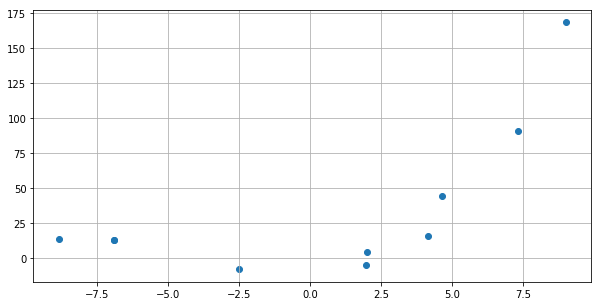

In [4]:
plt.figure(figsize=(10, 5))
plt.scatter(points_x, points_y)
plt.grid()
plt.show()

In [5]:
def plot_model(max_degree, x_range):
    plt.figure(figsize=(10, 5))
    plt.scatter(points_x, points_y)
    model = PolynomialRegression(max_degree).fit(points_x, points_y)
    all_x = np.arange(-x_range, x_range+0.1, 0.1)
    plt.plot(all_x, model.predict(all_x))
    plt.title('$max_d = {}$'.format(max_degree))
    plt.grid()
    plt.show()

OptimalDegree: 0, Loss: 27089.597229987623


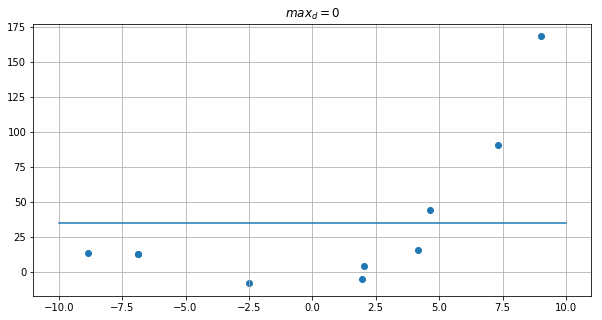

OptimalDegree: 1, Loss: 15650.232585147232


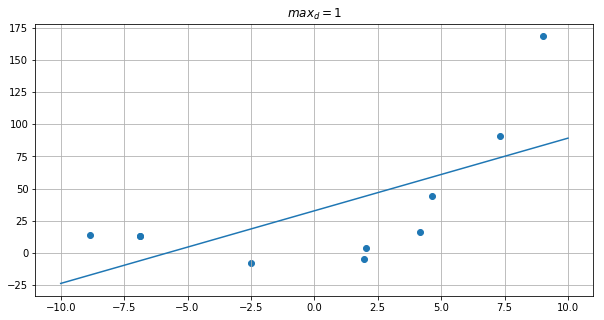

OptimalDegree: 2, Loss: 1581.588136468677


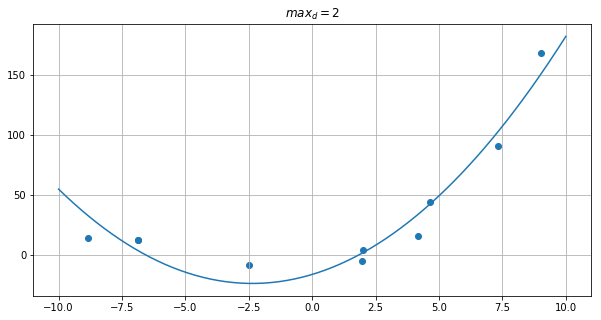

OptimalDegree: 3, Loss: 351.525883228014


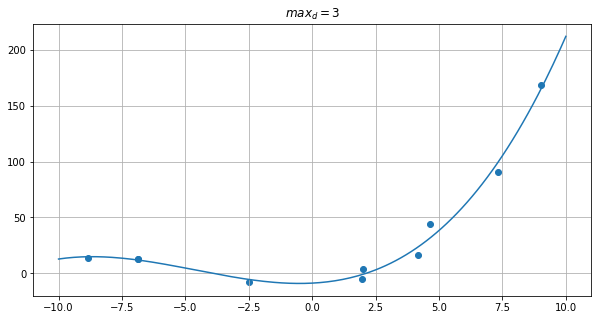

OptimalDegree: 4, Loss: 349.5512056649696


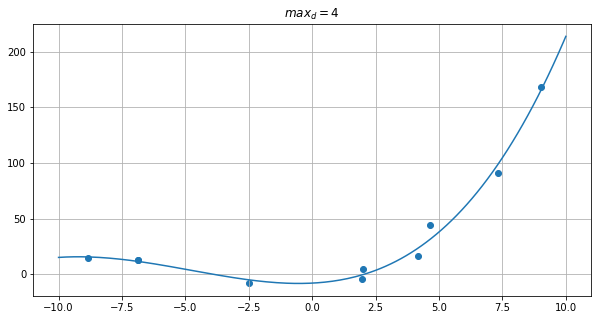

OptimalDegree: 5, Loss: 292.21928376096304


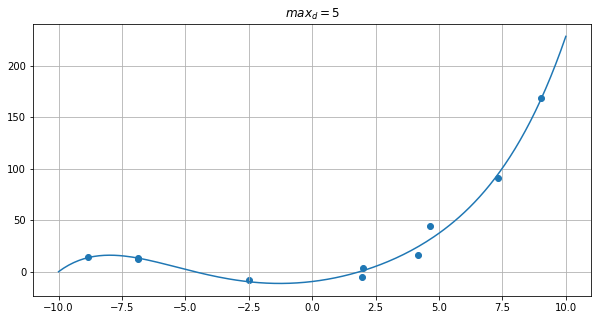

OptimalDegree: 6, Loss: 251.26285574615122


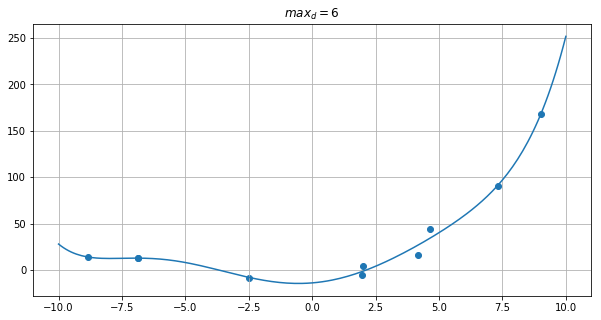

OptimalDegree: 7, Loss: 60.155155674603016


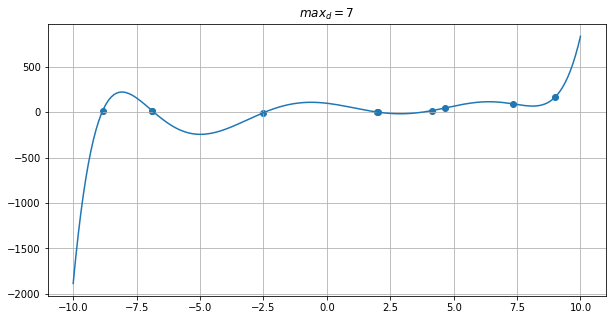

OptimalDegree: 8, Loss: 2.9575530489116213


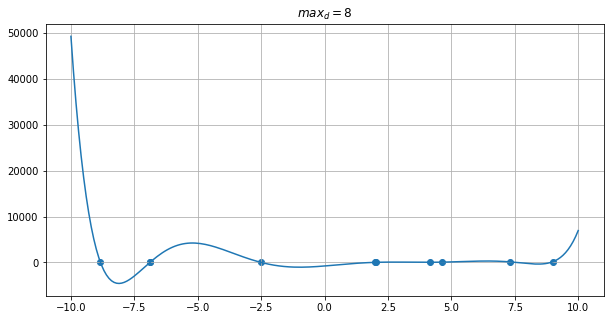

OptimalDegree: 9, Loss: 7.61777624572906e-07


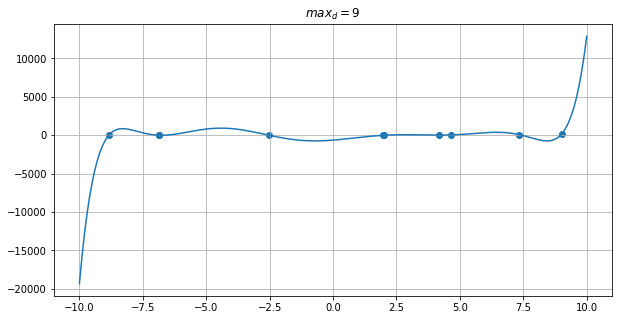

In [6]:
for i in range(10):
    plot_model(i, 10)

**Пример 2**

In [7]:
np.random.seed(42)
points_x = np.random.uniform(-20, 20, size=100)
# we use list comprehesion but think about how to write it using np.array operations
points_y = np.array([4 - np.sin(x) + x ** 2 + 0.01 * x ** 3 + np.random.uniform(-30, 30) for x in points_x])

OptimalDegree: 0, Loss: 1446823.1356046968


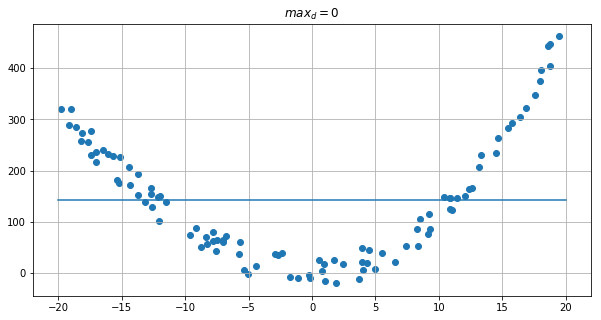

OptimalDegree: 1, Loss: 1423117.2749909905


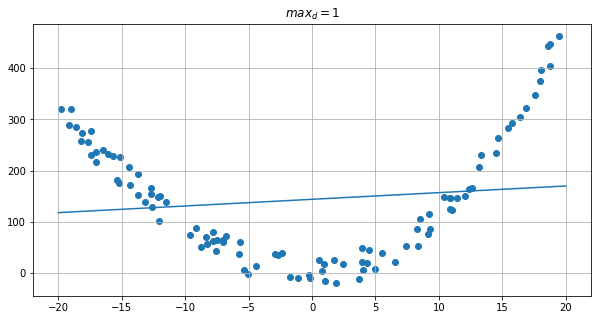

OptimalDegree: 2, Loss: 49196.36727267808


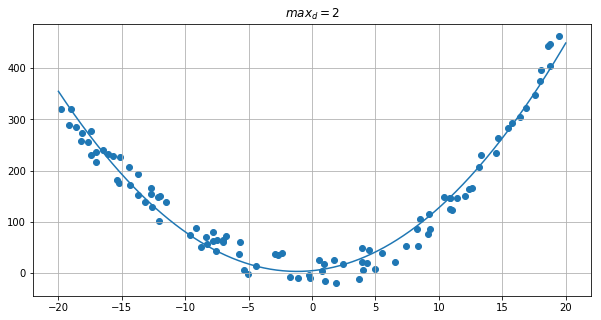

OptimalDegree: 3, Loss: 30359.47340995767


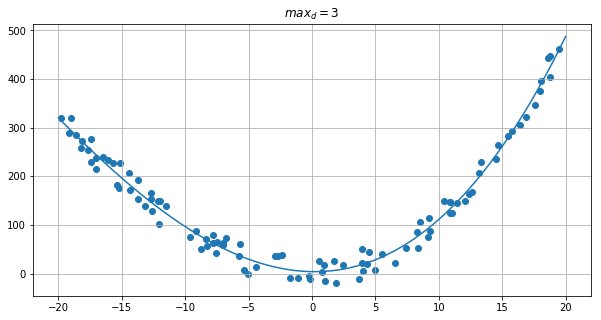

OptimalDegree: 4, Loss: 30358.741049988967


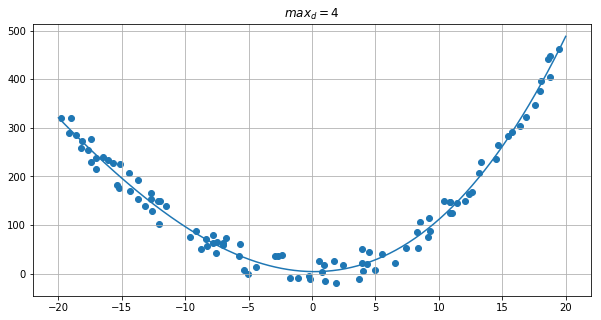

OptimalDegree: 5, Loss: 30351.945991132234


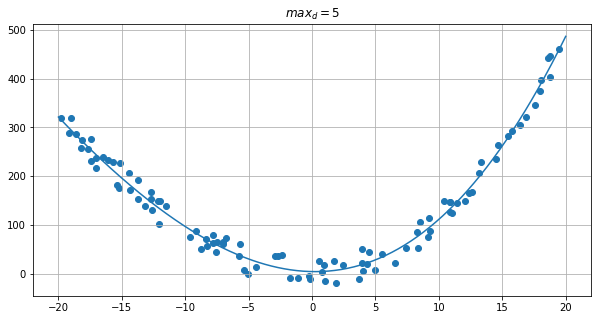

OptimalDegree: 6, Loss: 30235.508301631882


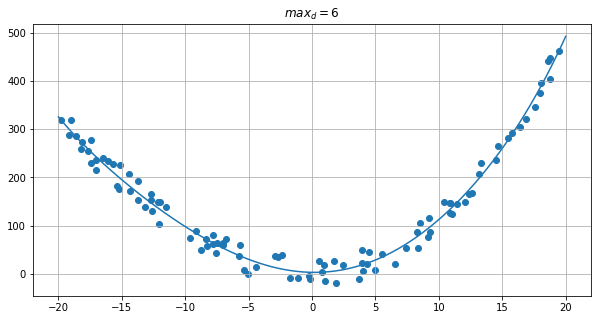

OptimalDegree: 7, Loss: 30176.842269865476


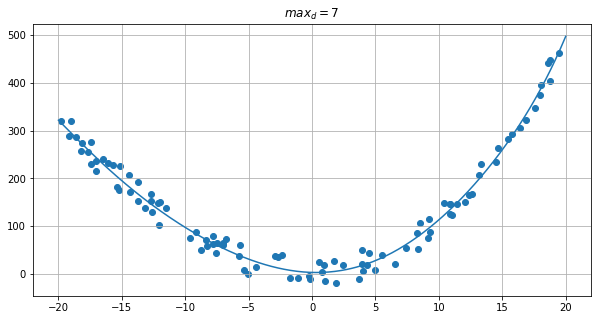

OptimalDegree: 8, Loss: 29805.571892310785


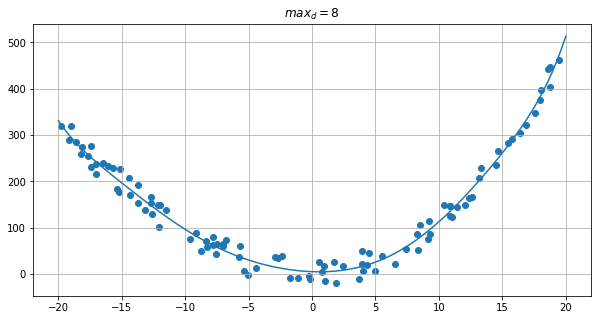

OptimalDegree: 9, Loss: 29755.786196999536


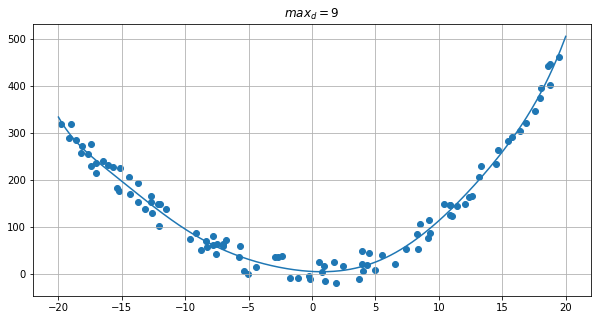

In [8]:
for i in range(10):
    plot_model(i, 20)